# **Disease prediction using machine learning**

In this data-driven journey, we will venture into the realm of disease prediction using machine learning, guided by our expert data scientist. Our dataset contains vital information regarding the diagnosis of heart disease patients. Through the power of machine learning, we aim to predict whether an individual is susceptible to heart disease, leveraging features such as chest pain type, age, sex, and more.

Heart disease stands as a prominent cause of morbidity and mortality on a global scale. Predicting cardiovascular disease is a crucial area within clinical data analysis, considering its profound impact on public health. The healthcare industry harbors a vast reservoir of data, and the process of data mining transforms this extensive healthcare repository into actionable insights, facilitating informed decision-making and predictions.

Our journey unfolds by training machine learning models capable of discerning the presence or absence of heart disease based on a comprehensive set of attributes. To achieve this, we draw upon the Cleveland Heart Disease dataset, sourced from the UCI repository. As we traverse this path, each line of code and model developed brings us closer to unraveling the secrets of disease prediction.

Our ultimate goal is to empower healthcare professionals and individuals with data-driven insights, enhancing their ability to make early and accurate predictions regarding heart disease. Through the utilization of machine learning, we aim to contribute to the vital task of improving public health and the well-being of individuals across the world.



##**Module 1**

###**Task 1: Importing Health Data**
In this task, we import health data from the 'heart_cleveland_upload.csv' file. This initial step is essential for our comprehensive analysis of factors influencing health. By loading this data, we set the stage for a deeper exploration of health-related factors and their impact on the project.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#--- Import Pandas ---
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Datasets/data.csv")
#--- Inspect data ---
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


### **Task2:Identifying Null Values**

In this task, our focus shifts to identifying and quantifying null values within our health data. The count of null values (represented as 'sumofnull' in the code) is a crucial metric. It helps us assess data completeness and quality, ensuring we are aware of any missing information. Recognizing and addressing null values is paramount for accurate and reliable analysis in our project. This meticulous examination of null values contributes to the project's overall data integrity and the generation of meaningful insights.

In [ ]:

sumofnull = df.isnull().sum()

#--- Inspect data ---
sumofnull

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

### **Task 3: Examining Data Types**

In this task, we shift our focus to examining the data types within our health data. This step involves analyzing the types of variables present in the dataset, ensuring that we have a clear understanding of the nature of the data. By executing the code and generating the 'datatype' results, we set the foundation for data interpretation and manipulation in our project. This knowledge is essential for making informed decisions and performing accurate analyses based on the specific data types present in the dataset.

In [ ]:
#identyfying the data type
datatype =df.dtypes

#--- Inspect data ---
datatype

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

### **Task 4: Identifying Numerical and Categorical Features**

In this task, we classify the features within our health data into two categories: numerical and categorical. This classification is crucial for our data analysis and modeling efforts. Understanding the nature of these features is essential for the project, allowing us to employ appropriate methods to draw meaningful insights and make informed decisions.

In [ ]:

numeric_features = [["age","trestbps","chol","thalach","oldpeak","condition"]]
cat_features=[["sex","cp","fbs","restecg","exang","slope","ca","thal"]]
#--- Inspect data ---
print(numeric_features)
print(cat_features)

[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'condition']]
[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']]


###**Task 5: Converting Features to Categorical Data Types**


In this task, we transform selected features into categorical data types. Specifically, we convert 'sex,' 'cp,' 'fbs,' 'restecg,' 'exang,' 'slope,' 'ca,' and 'thal' into categorical variables. This conversion is a key step in our data preprocessing, as it ensures that these features are treated appropriately in our analysis. By executing the code and obtaining the 'dtype' results, we ensure that our data is appropriately structured for more effective data exploration and modeling in our project.

In [ ]:

# Assuming 'df' is your DataFrame containing the data
# cat_features is the list of columns to convert to categorical values
cat_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Step 1: Create a list 'lst' that contains the names of columns for which you want to change the data type
lst = cat_features

# Step 2: Use 'df[lst]' to select the specified columns
selected_columns = df[lst]

# Step 3: Change the data type of the selected columns to 'object' using '.astype(object)'
selected_columns = selected_columns.astype(object)

# Step 4: Update the original DataFrame with the converted columns
df[lst] = selected_columns

# Step 5: Obtain the data types of the columns after the conversion with 'df.dtypes'
updated_dtypes = df.dtypes

print(updated_dtypes)

age            int64
sex           object
cp            object
trestbps       int64
chol           int64
fbs           object
restecg       object
thalach        int64
exang         object
oldpeak      float64
slope         object
ca            object
thal          object
condition      int64
dtype: object


## **Module 2**

###**Task 1: Exploring Feature Correlations**

In this task, we delve into the exploration of feature correlations within our health data. By generating a heatmap using the 'sns.heatmap' function, we visualize the relationships between numerical features . This visualization is pivotal for understanding how these features interact and impact each other within the dataset. Analyzing feature correlations aids in uncovering potential insights and patterns that will be crucial for our project's data-driven conclusions and decision-making.

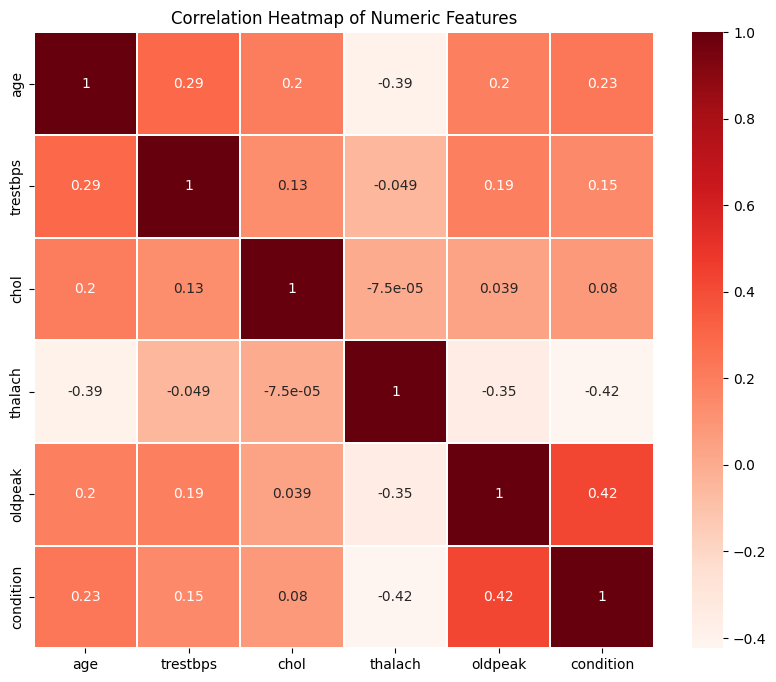

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "condition"]

# Step 1: Select the relevant columns from the DataFrame 'df' for correlation analysis
selected_numeric_columns = df[numeric_features]

# Step 2: Calculate the correlation between these selected columns using 'corr()'
corr_data = selected_numeric_columns.corr()

# Step 3: Create a heatmap using 'sns.heatmap()'
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_data, annot=True, cmap="Reds", linewidths=0.1)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


### **Task 2: Visualizing Health Conditions**

In this task, we create a countplot to visualize the distribution of health conditions within our dataset. By generating this plot, we gain a clear overview of the prevalence of different health conditions. This visualization is essential for understanding the distribution of health outcomes in our dataset, a fundamental aspect of our project's analysis. It provides a visual representation of health conditions that will help us draw insights and make informed decisions based on the data.

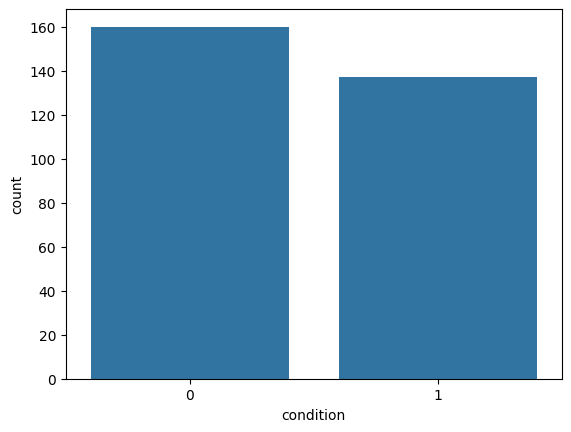

In [ ]:
# Create a countplot of the 'condition' column from the DataFrame 'df'
condition_ax = sns.countplot(x=df["condition"])

# Display the countplot
plt.show()


### **Task 3: Analyzing Health Conditions by Gender**

In this task, we generate a countplot to analyze health conditions with respect to gender. By creating this plot, we gain insights into how different health conditions are distributed among males and females. This visualization is crucial for understanding gender-specific trends in health outcomes, a key aspect of our project's analysis. It provides a clear visual representation of how health conditions vary by gender, enabling us to draw meaningful conclusions and make informed decisions based on the data.

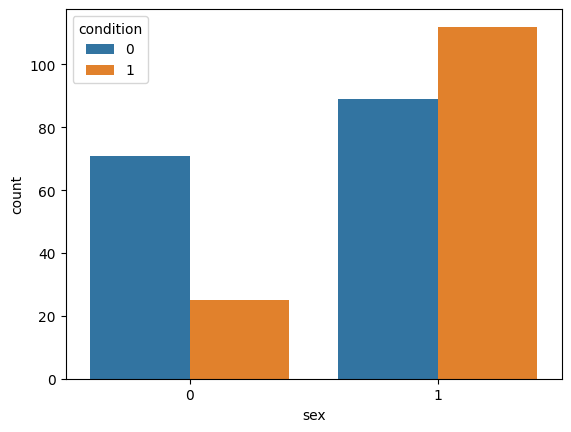

In [ ]:
# Create a countplot of the 'sex' column from the DataFrame 'df' with hue based on 'condition'
sex_ax = sns.countplot(x=df["sex"], hue=df['condition'])

# Display the countplot
plt.show()

### **Task 4: Examining Chest Pain Types and Health Conditions**

In this task, we use a countplot to examine the relationship between different types of chest pain ('cp') and health conditions. By visualizing this data, we gain insights into how various chest pain types are associated with different health conditions. This analysis is pivotal for understanding the impact of chest pain on health outcomes, a significant aspect of our project's research. It provides a clear visual representation of these relationships, helping us to draw meaningful conclusions and make informed decisions based on the data.

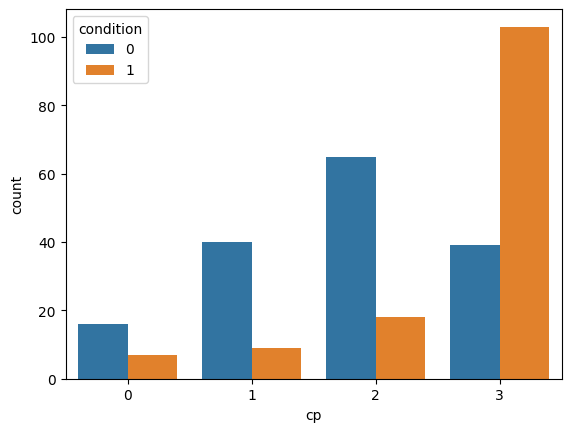

In [ ]:
# Create a countplot of the 'cp' column from the DataFrame 'df' with hue based on 'condition'
cp_ax = sns.countplot(x=df["cp"], hue=df['condition'])

# Display the countplot
plt.show()

### **Task 5: Investigating Fasting Blood Sugar Levels and Health Conditions**

In this task, we employ a countplot to investigate the relationship between fasting blood sugar levels ('fbs') and health conditions. By visualizing this data, we gain insights into how different fasting blood sugar levels are associated with various health conditions. This analysis is crucial for understanding the impact of blood sugar levels on health outcomes, a significant aspect of our project's research. The countplot provides a clear visual representation of these relationships, allowing us to draw meaningful conclusions and make informed decisions based on the data.

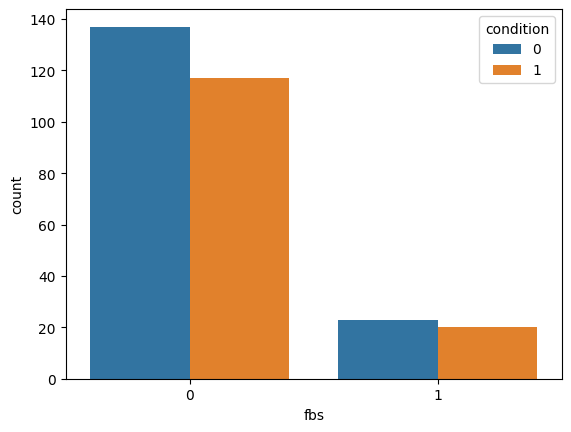

In [ ]:
# Create a countplot of the 'fbs' column from the DataFrame 'df' with hue based on 'condition'
fbs_ax = sns.countplot(x=df["fbs"], hue=df['condition'])

# Display the countplot
plt.show()

### **Task 6: Analyzing Resting Electrocardiographic Results and Health Conditions**

In this task, we utilize a countplot to analyze the connection between resting electrocardiographic results ('restecg') and health conditions. By visualizing this data, we gain insights into how different resting electrocardiographic outcomes are linked to various health conditions. This analysis is critical for understanding the impact of electrocardiographic results on health outcomes, a significant aspect of our project's research.

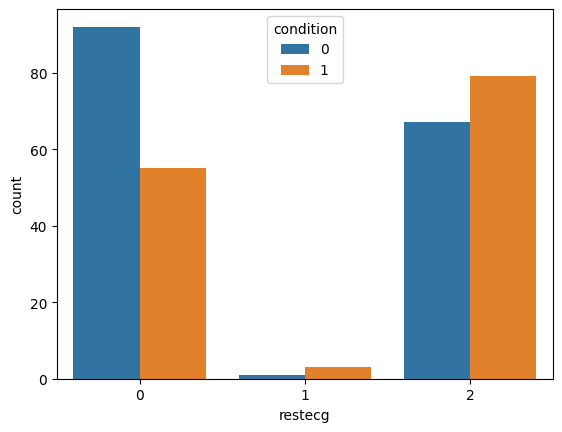

In [ ]:

# Create a countplot of the 'restecg' column from the DataFrame 'df' with hue based on 'condition'
restecg_ax = sns.countplot(x=df["restecg"], hue=df['condition'])

# Display the countplot
plt.show()

### **Task 7: Examining Exercise-Induced Angina and Health Conditions**

In this task, we employ a countplot to examine the relationship between exercise-induced angina ('exang') and health conditions. By visualizing this data, we gain insights into how the presence or absence of exercise-induced angina is associated with various health conditions. This analysis is essential for understanding the impact of exercise-induced angina on health outcomes, a significant aspect of our project's research. The countplot provides a clear visual representation of these relationships, enabling us to draw meaningful conclusions and make informed decisions based on the data.

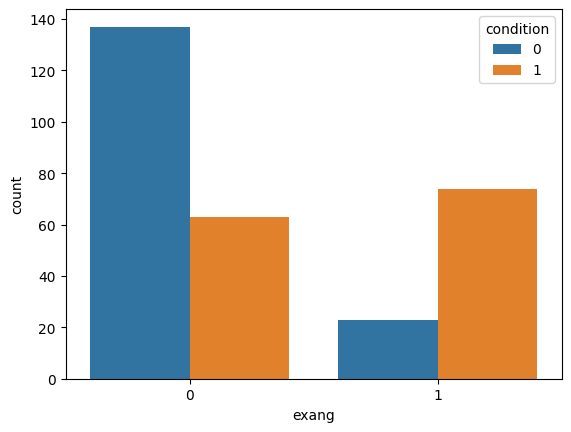

In [ ]:

# Create a countplot of the 'exang' column from the DataFrame 'df' with hue based on 'condition'
exang_ax = sns.countplot(x=df["exang"], hue=df['condition'])

# Display the countplot
plt.show()

### **Task 8: Investigating the Slope of the ST Segment and Health Conditions**

In this task, we use a countplot to investigate the relationship between the slope of the ST segment ('slope') and health conditions. By visualizing this data, we gain insights into how different ST segment slopes are associated with various health conditions. This analysis is crucial for understanding the impact of the ST segment's slope on health outcomes, a significant aspect of our project's research. The countplot provides a clear visual representation of these relationships, allowing us to draw meaningful conclusions and make informed decisions based on the data.

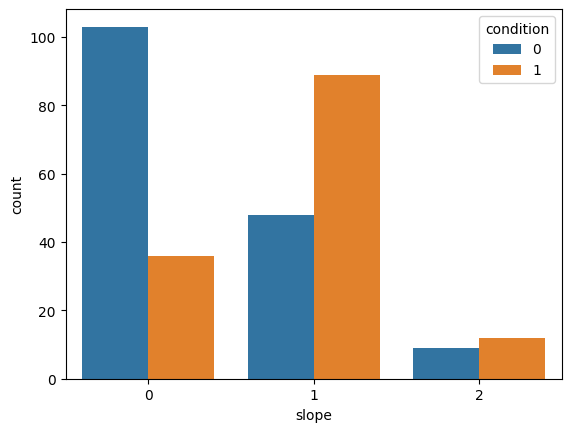

In [ ]:
# Create a countplot of the 'slope' column from the DataFrame 'df' with hue based on 'condition'
slope_ax = sns.countplot(x=df["slope"], hue=df['condition'])

# Display the countplot
plt.show()

### **Task 9: Analyzing the Number of Major Vessels Colored by Fluoroscopy and Health Conditions**

In this task, we employ a countplot to analyze the relationship between the number of major vessels colored by fluoroscopy ('ca') and health conditions. By visualizing this data, we gain insights into how the number of colored vessels is associated with various health conditions. This analysis is critical for understanding the impact of major vessel involvement on health outcomes, a significant aspect of our project's research. The countplot provides a clear visual representation of these relationships, enabling us to draw meaningful conclusions and make informed decisions based on the data.

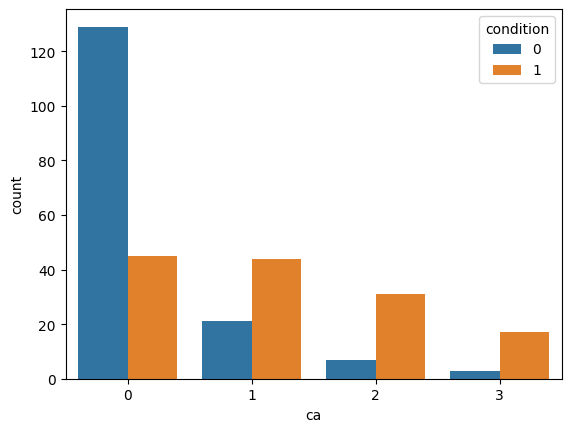

In [ ]:
# Create a countplot of the 'ca' column from the DataFrame 'df' with hue based on 'condition'
ca_ax = sns.countplot(x=df["ca"], hue=df['condition'])

# Display the countplot
plt.show()

### **Task 10: Examining Thalassemia and Health Conditions**

In this task, we utilize a countplot to examine the relationship between thalassemia ('thal') and health conditions. By visualizing this data, we gain insights into how different thalassemia categories are associated with various health conditions. This analysis is essential for understanding the impact of thalassemia on health outcomes, a significant aspect of our project's research. The countplot provides a clear visual representation of these relationships, aiding us in drawing meaningful conclusions and making informed decisions based on the data.

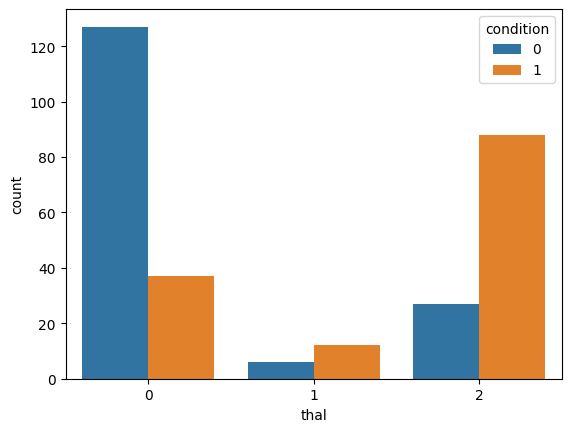

In [ ]:
# Create a countplot of the 'thal' column from the DataFrame 'df' with hue based on 'condition'
thal_ax = sns.countplot(x=df["thal"], hue=df['condition'])

# Display the countplot
plt.show()

## **Module 3**

###**Task 1: Visualizing Age Distribution**
In this task, we create a histogram to visualize the distribution of age in our dataset. The histogram is constructed using the 'age' column from the dataset and is presented with 20 bins for better visualization. This plot helps us gain insights into the distribution of ages within the dataset and is a critical aspect of our project's analysis to understand the age demographics of the individuals in our data.

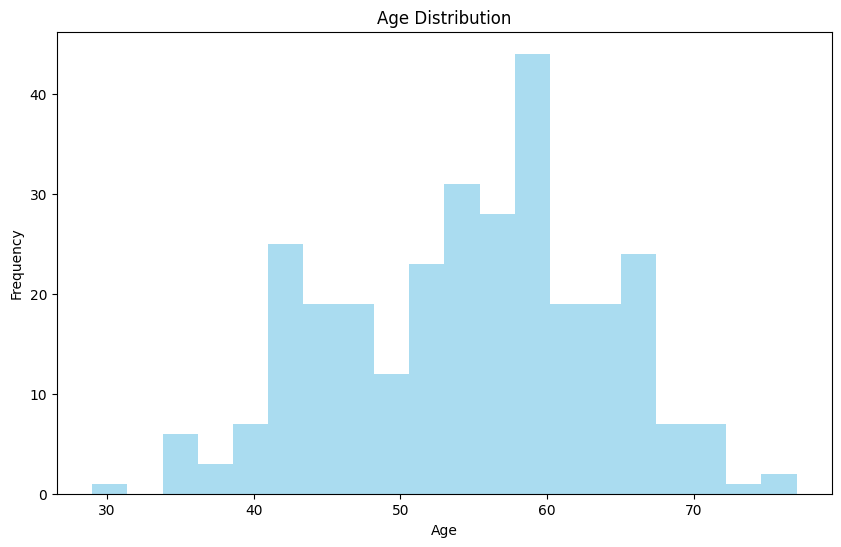

In [ ]:
# Extract the 'age' column and store it in the 'age_col' variable
age_col = df['age']

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Generate a histogram for the 'age' column
plt.hist(age_col, bins=20, color='skyblue', alpha=0.7)

# Label the x-axis
plt.xlabel('Age')

# Label the y-axis
plt.ylabel('Frequency')

# Set the title
plt.title('Age Distribution')

# Display the histogram
plt.show()

###**Task 2: Visualizing Resting Blood Pressure Distribution**
In this task, we create a histogram to visualize the distribution of resting blood pressure ('trestbps') in our dataset. The histogram is constructed using the 'trestbps' column from the dataset and is presented with 20 bins for better visualization. This plot helps us gain insights into the distribution of resting blood pressure levels within the dataset and is an important aspect of our project's analysis to understand the distribution of this health-related feature.

Text(0.5, 1.0, 'trestbps Distribution')

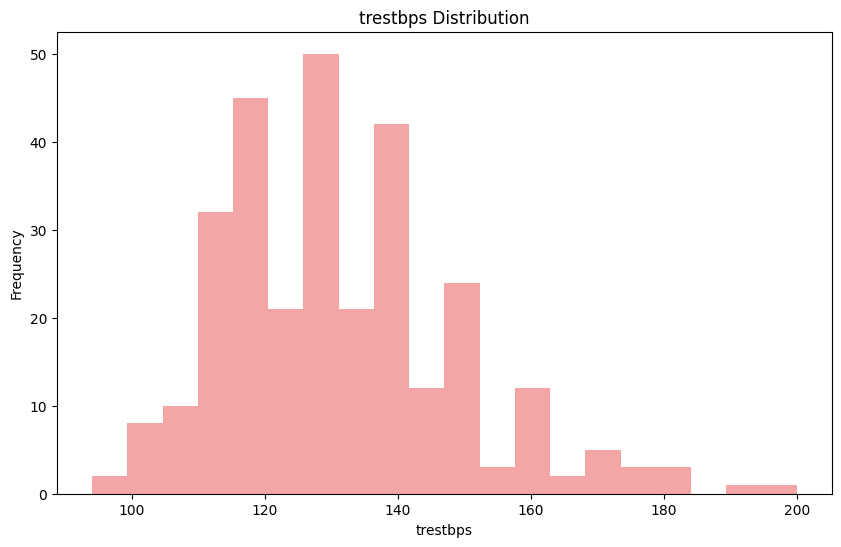

In [ ]:

# Extract the 'trestbps' column and store it in the 'trestbps_col' variable
trestbps_col = df['trestbps']

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Generate a histogram for the 'trestbps' column
plt.hist(trestbps_col, bins=20, color='lightcoral', alpha=0.7)

# Label the x-axis
plt.xlabel('trestbps')

# Label the y-axis
plt.ylabel('Frequency')

# Set the title
plt.title('trestbps Distribution')

###**Task 3: Visualizing Cholesterol Distribution**
In this task, we create a histogram to visualize the distribution of cholesterol levels ('chol') in our dataset. The histogram is constructed using the 'chol' column from the dataset and is presented with 20 bins for better visualization. This plot helps us gain insights into the distribution of cholesterol levels within the dataset, which is a critical aspect of our project's analysis to understand the distribution of this health-related feature.

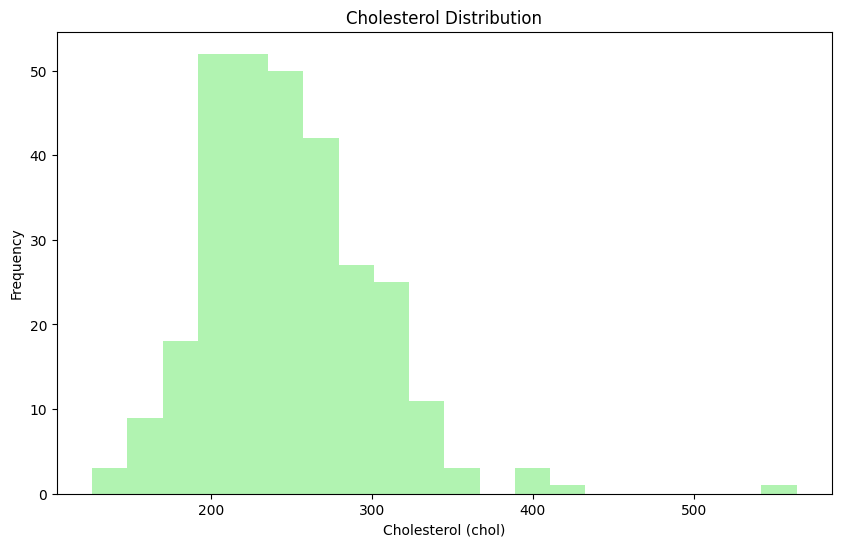

In [ ]:

# Extract the 'chol' column and store it in the 'chol_col' variable
chol_col = df['chol']

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Generate a histogram for the 'chol' column
plt.hist(chol_col, bins=20, color='lightgreen', alpha=0.7)

# Label the x-axis
plt.xlabel('Cholesterol (chol)')

# Label the y-axis
plt.ylabel('Frequency')

# Set the title
plt.title('Cholesterol Distribution')

# Display the histogram
plt.show()

###**Task 4: Visualizing Maximum Heart Rate Distribution**
In this task, we create a histogram to visualize the distribution of maximum heart rate ('thalach') in our dataset. The histogram is constructed using the 'thalach' column from the dataset and is presented with 20 bins for better visualization. This plot helps us gain insights into the distribution of maximum heart rate levels within the dataset, which is a critical aspect of our project's analysis to understand the distribution of this health-related feature.

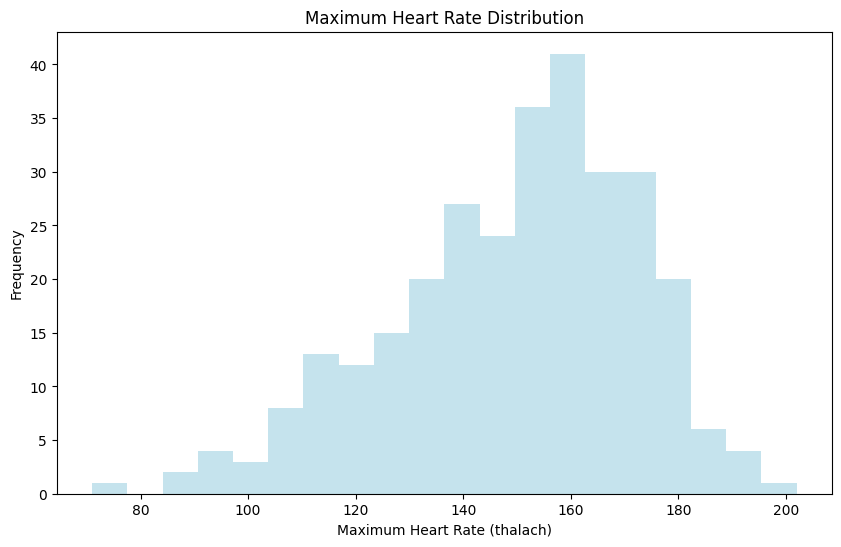

In [ ]:
# Extract the 'thalach' column and store it in the 'thalach_col' variable
thalach_col = df['thalach']

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Generate a histogram for the 'thalach' column
plt.hist(thalach_col, bins=20, color='lightblue', alpha=0.7)

# Label the x-axis
plt.xlabel('Maximum Heart Rate (thalach)')

# Label the y-axis
plt.ylabel('Frequency')

# Set the title
plt.title('Maximum Heart Rate Distribution')

# Display the histogram
plt.show()

###**Task 5: Visualizing ST Depression Distribution**
In this task, we create a histogram to visualize the distribution of ST depression ('oldpeak') in our dataset. The histogram is constructed using the 'oldpeak' column from the dataset and is presented with 20 bins for better visualization. This plot helps us gain insights into the distribution of ST depression levels within the dataset, which is a critical aspect of our project's analysis to understand the distribution of this health-related feature.

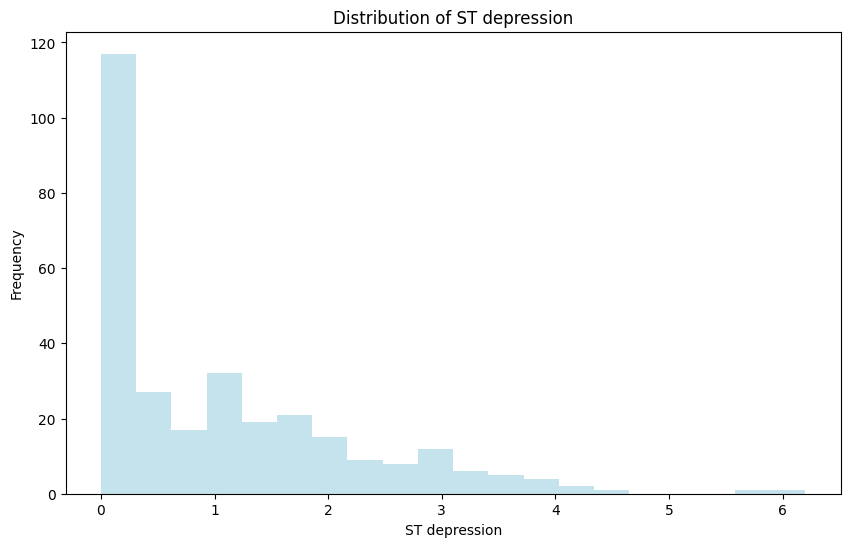

In [ ]:
# Extract the 'oldpeak' column and store it in the 'oldpeak_col' variable
oldpeak_col = df['oldpeak']

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Generate a histogram for the 'oldpeak' column
plt.hist(oldpeak_col, bins=20, color='lightblue', alpha=0.7)

# Label the x-axis
plt.xlabel('ST depression')

# Label the y-axis
plt.ylabel('Frequency')

# Set the title
plt.title('Distribution of ST depression')

# Display the histogram
plt.show()

###**Task 6: Visualizing Chest Pain Types, Age, and Health Condition**
In this task, we use a violin plot to visualize the relationship between different chest pain types ('cp'), age, and health conditions. By generating this plot, we gain insights into how chest pain types are distributed across different age groups and their association with health conditions. This visualization is essential for understanding how chest pain and age impact health outcomes, a significant aspect of our project's analysis. The violin plot provides a clear representation of these relationships, allowing us to draw meaningful conclusions and make informed decisions based on the data.

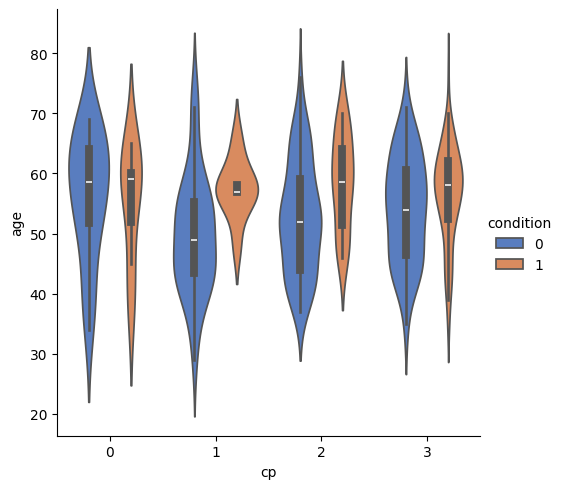

In [ ]:

# Create a violin plot using sns.catplot()
violinplt = sns.catplot(x='cp', y='age', hue='condition', data=df, kind='violin', palette='muted')

# Display the plot
plt.show()

###**Task 7: Analyzing Fasting Blood Sugar Levels and Health Conditions**
In this task, we use a countplot to analyze the relationship between fasting blood sugar levels ('fbs') and health conditions. By generating this plot, we gain insights into how different fasting blood sugar levels are associated with various health conditions. This analysis is crucial for understanding how fasting blood sugar impacts health outcomes, a significant aspect of our project's research. The countplot provides a clear visual representation of these relationships, enabling us to draw meaningful conclusions and make informed decisions based on the data.

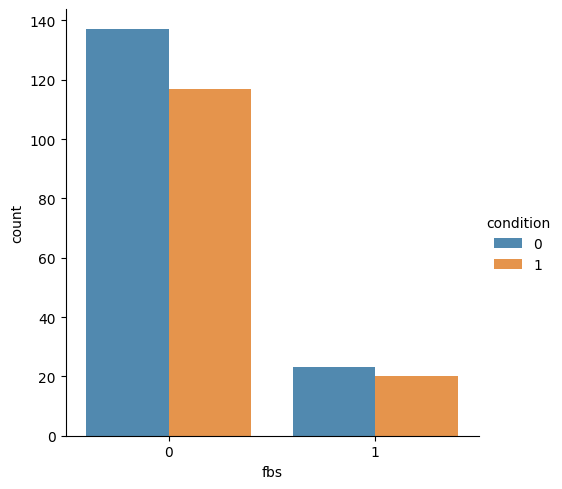

In [ ]:

# Create a count plot using sns.catplot()
countplt = sns.catplot(x='fbs', hue='condition', kind='count', data=df, alpha=0.85)

# Display the plot
plt.show()

##**Module 4**

###**Task 1: Encoding Categorical Features**

In this task, we encode categorical features within our dataset, specifically 'cp,' 'thal,' and 'slope,' using one-hot encoding. By executing this code, we transform these categorical variables into a numerical format, allowing us to incorporate them into our analysis effectively. This encoding is vital for our project, as it enables us to work with categorical data and gain insights into how these features influence health conditions and outcomes. The resulting 'df_encoded' dataset is now prepared for further analysis and model building.

In [ ]:
# Define the list of categorical columns to be encoded
categorical_cols = ['cp','thal','slope']

# Iterate through the categorical columns and cast each to integer data type
for col in categorical_cols:
    df[col] = df[col].astype(int)

# Perform one-hot encoding on the specified categorical columns in df
df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix_sep='_', dtype=int)
df_encoded = df_encoded.astype(int)
# Check the data types of the columns in the encoded DataFrame to ensure they are of integer type
print(df_encoded.dtypes)

age          int64
sex          int64
trestbps     int64
chol         int64
fbs          int64
restecg      int64
thalach      int64
exang        int64
oldpeak      int64
ca           int64
condition    int64
cp_0         int64
cp_1         int64
cp_2         int64
cp_3         int64
thal_0       int64
thal_1       int64
thal_2       int64
slope_0      int64
slope_1      int64
slope_2      int64
dtype: object


###**Task 2: Preparing Features and Target Variable**
In this task, we prepare the features and the target variable for our analysis. We create the variable 'x' by excluding the 'condition' column, which serves as our feature set. The 'y' variable is defined as the 'condition' column, representing our target variable. This separation is fundamental for our project as it sets the stage for further data analysis, modeling, and understanding the relationship between the features and the health condition outcomes in our dataset.

In [ ]:
# Create DataFrame 'x' by excluding the 'condition' column
x = df_encoded.drop('condition', axis=1)

# Set 'y' as the 'condition' column
y = df_encoded['condition']


###**Task 3: Scaling Features**
In this task, we use the MinMaxScaler from the sklearn library to scale the feature set 'x.' Scaling is crucial for ensuring that all the features are on a similar scale, preventing any feature from dominating the analysis due to its magnitude. By applying the MinMaxScaler, we transform the features to a common range, which is vital for the accuracy and effectiveness of our analysis and modeling in our project.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'x' DataFrame using MinMaxScaler
x_scaled = scaler.fit_transform(x)


#--- Inspect data ---
print(x_scaled)

[[0.83333333 1.         0.62264151 ... 0.         1.         0.        ]
 [0.83333333 0.         0.43396226 ... 1.         0.         0.        ]
 [0.77083333 0.         0.52830189 ... 0.         0.         1.        ]
 ...
 [0.125      1.         0.24528302 ... 0.         1.         0.        ]
 [0.125      0.         0.41509434 ... 1.         0.         0.        ]
 [0.125      1.         0.30188679 ... 1.         0.         0.        ]]


###**Task 4: Splitting the Data into Training and Testing Sets**
In this task, we split our dataset into training and testing sets using the train_test_split function from the sklearn library. The training set, 'X_train' and 'Y_train,' is designed to train our predictive models, while the testing set, 'X_test' and 'Y_test,' is reserved for evaluating the model's performance. By performing this data split, we ensure that our models are trained and tested on different data subsets, which is essential for assessing their accuracy and generalization to new data in our project.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, train_size=0.8, test_size=0.2,random_state=4)


## **Module 5**

###**Task 1: Building and Evaluating Logistic Regression Model**

In this task, we build a logistic regression model for our project. We use the sklearn library to create the 'lr_model' and train it using the training data, 'X_train' and 'Y_train.' Additionally, we assess the model's performance through cross-validation, with 10 folds, to estimate its accuracy. The 'lr_mean_score' represents the mean accuracy across the folds. Evaluating the logistic regression model is essential for understanding its predictive capabilities in our project and drawing meaningful conclusions based on its performance.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create logistic regression model
lr_model = LogisticRegression()

# Fit the model to the training data
lr_model.fit(X_train, Y_train)

# Perform cross-validation with 10 folds
lr_cv_results = cross_val_score(lr_model, X_train, Y_train, cv=10)

# Calculate the mean score from cross-validation
lr_mean_score = round(lr_cv_results.mean(), 4)
print(lr_mean_score)


0.8268


###**Task 2: Building and Evaluating Linear Discriminant Analysis Model**

In this task, we construct a Linear Discriminant Analysis (LDA) model for our project using the sklearn library. We create the 'ldr_model' and train it with the training data, 'X_train' and 'Y_train.' Subsequently, we assess the model's performance through cross-validation with 10 folds, calculating the mean accuracy. The 'ldr_mean_score' represents this mean accuracy. Evaluating the LDA model is crucial for understanding its classification capabilities and is vital for our project's analysis and decision-making based on its performance.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

# Create LDA model
ldr_model = LinearDiscriminantAnalysis()

# Fit the model to the training data
ldr_model.fit(X_train, Y_train)

# Perform cross-validation with 10 folds
ldr_cv_results = cross_val_score(ldr_model, X_train, Y_train, cv=10)

# Calculate the mean score from cross-validation
ldr_mean_score = round(ldr_cv_results.mean(), 4)
print(ldr_mean_score )

0.8266


###**Task 3: Building and Evaluating K-Nearest Neighbors (KNN) Model**
In this task, we construct a K-Nearest Neighbors (KNN) model for our project using the sklearn library. We create the 'knn_model' and train it with the training data, 'X_train' and 'Y_train.' Subsequently, we assess the model's performance through cross-validation with 10 folds, calculating the mean accuracy. The 'knn_mean_score' represents this mean accuracy. Evaluating the KNN model is crucial for understanding its classification capabilities, which is essential for our project's analysis and decision-making based on its performance.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Create KNN model
knn_model = KNeighborsClassifier()

# Fit the model to the training data
knn_model.fit(X_train, Y_train)

# Perform cross-validation with 10 folds
knn_cv_results = cross_val_score(knn_model, X_train, Y_train, cv=10)

# Calculate the mean score from cross-validation
knn_mean_score = round(knn_cv_results.mean(), 4)

# Calculate the standard deviation of the scores
knn_std_score = round(knn_cv_results.std(), 4)
print(knn_std_score)

0.0767


###**Task 4: Building and Evaluating Decision Tree Classifier Model**
In this task, we build a Decision Tree Classifier model for our project using the sklearn library. We create the 'dt_model' and train it with the training data, 'X_train' and 'Y_train.' Subsequently, we assess the model's performance through cross-validation with 10 folds, calculating the mean accuracy. The 'dt_mean_score' represents this mean accuracy. Evaluating the Decision Tree Classifier model is crucial for understanding its classification capabilities, which is essential for our project's analysis and decision-making based on its performance.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Create Decision Tree Classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train, Y_train)

# Perform cross-validation with 10 folds
dt_cv_results = cross_val_score(dt_model, X_train, Y_train, cv=10)

# Calculate the mean score from cross-validation
dt_mean_score = round(dt_cv_results.mean(), 4)
print(dt_mean_score)


0.7382


###**Task 5: Building and Evaluating Gaussian Naive Bayes Model**

In this task, we construct a Gaussian Naive Bayes model for our project using the sklearn library. We create the 'gnb_model' and train it with the training data, 'X_train' and 'Y_train.' Subsequently, we assess the model's performance through cross-validation with 10 folds, calculating the mean accuracy. The 'gnb_mean_score' represents this mean accuracy. Evaluating the Gaussian Naive Bayes model is crucial for understanding its classification capabilities, which is essential for our project's analysis and decision-making based on its performance.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Create Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Fit the model to the training data
gnb_model.fit(X_train, Y_train)

# Perform cross-validation with 10 folds
gnb_cv_results = cross_val_score(gnb_model, X_train, Y_train, cv=10)

# Calculate the mean score from cross-validation
gnb_mean_score = round(gnb_cv_results.mean(), 4)

print(gnb_mean_score)

0.852


###**Task 6: Building and Evaluating Random Forest Classifier Model**

In this task, we construct a Random Forest Classifier model for our project using the sklearn library. We create the 'rf_model' with 100 trees and a maximum of 3 features per split. The model is trained using the training data, 'X_train' and 'Y_train.' Subsequently, we assess the model's performance through cross-validation with 10 folds, calculating the mean accuracy. The 'rf_mean_score' represents this mean accuracy. Evaluating the Random Forest Classifier model is crucial for understanding its classification capabilities, which is essential for our project's analysis and decision-making based on its performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the number of trees and the maximum number of features
num_trees = 100
max_features = 'sqrt'

# Create Random Forest classifier model
rf_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

# Fit the model to the training data
rf_model.fit(X_train, Y_train)

# Perform cross-validation with 10 folds
rf_cv_results = cross_val_score(rf_model, X_train, Y_train, cv=10)

# Calculate the mean score from cross-validation
rf_mean_score = round(rf_cv_results.mean(), 4)

print(rf_mean_score)


0.8098


###**Task 7: Building and Evaluating Support Vector Classifier (SVC) Model**
In this task, we construct a Support Vector Classifier (SVC) model for our project using the sklearn library. We create the 'sv_model' and train it with the training data, 'X_train' and 'Y_train.' Subsequently, we assess the model's performance through cross-validation with 10 folds, calculating the mean accuracy. The 'sv_mean_score' represents this mean accuracy. Evaluating the Support Vector Classifier model is crucial for understanding its classification capabilities, which is essential for our project's analysis and decision-making based on its performance.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create SVM classifier model
sv_model = SVC()

# Fit the model to the training data
sv_model.fit(X_train, Y_train)

# Perform cross-validation with 10 folds
sv_cv_results = cross_val_score(sv_model, X_train, Y_train, cv=10)

# Calculate the mean score from cross-validation
sv_mean_score = round(sv_cv_results.mean(), 4)

print(sv_mean_score)

0.8183


###**Task 8: Evaluating Model Performance**
In this task, we evaluate the performance of the Gaussian Naive Bayes model on the testing data. We use the sklearn library to calculate accuracy, create a confusion matrix, and generate a classification report. These metrics help us understand how well the model performs in classifying health conditions based on the features. Evaluating the model's performance is essential for assessing its predictive capabilities and making informed decisions in our project.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Use the selected model to make predictions on the test data
y_pred = gnb_model.predict(X_test)   # Place the desired trained model

# i.e. gnb_model , rf_model etc.

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, y_pred)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Create the classification report
cr = classification_report(Y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        33
           1       0.78      0.67      0.72        27

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60



###Task 9: Making Predictions with Gaussian Naive Bayes Model

In this task, we utilize the trained Gaussian Naive Bayes model to make predictions on new data. We provide a set of features in the 'data' variable and use the 'gnb_model' to predict the corresponding health condition outcome. This prediction helps us understand how the model classifies a new instance based on the provided features, which is a crucial aspect of our project's analysis and decision-making.

In [ ]:
data = [[0.254, 1, 0.487, 0.362,  ## age_scaled, sex, trestbps_scaled, chol
             1, 0.5, 0.641, 1,  ## fbs, restecg_scaled, thalach_scaled, exang
             0.672, 0.863, 0,0 ,  ## oldpeak_scaled, ca_scaled, cp_0, cp_1
             0,1,0,0 ,  ## cp_2, cp_3, thal_0, thal_1
             0,1,0,1]]  ## thal_2, thal_3, slope_0, slope_1,
             #slope_2



# Use the selected model to make predictions for the sample data
prediction = gnb_model.predict(data)
print("Prediction of model",prediction)

Prediction of model [1]
